# Help! Find My Baby...

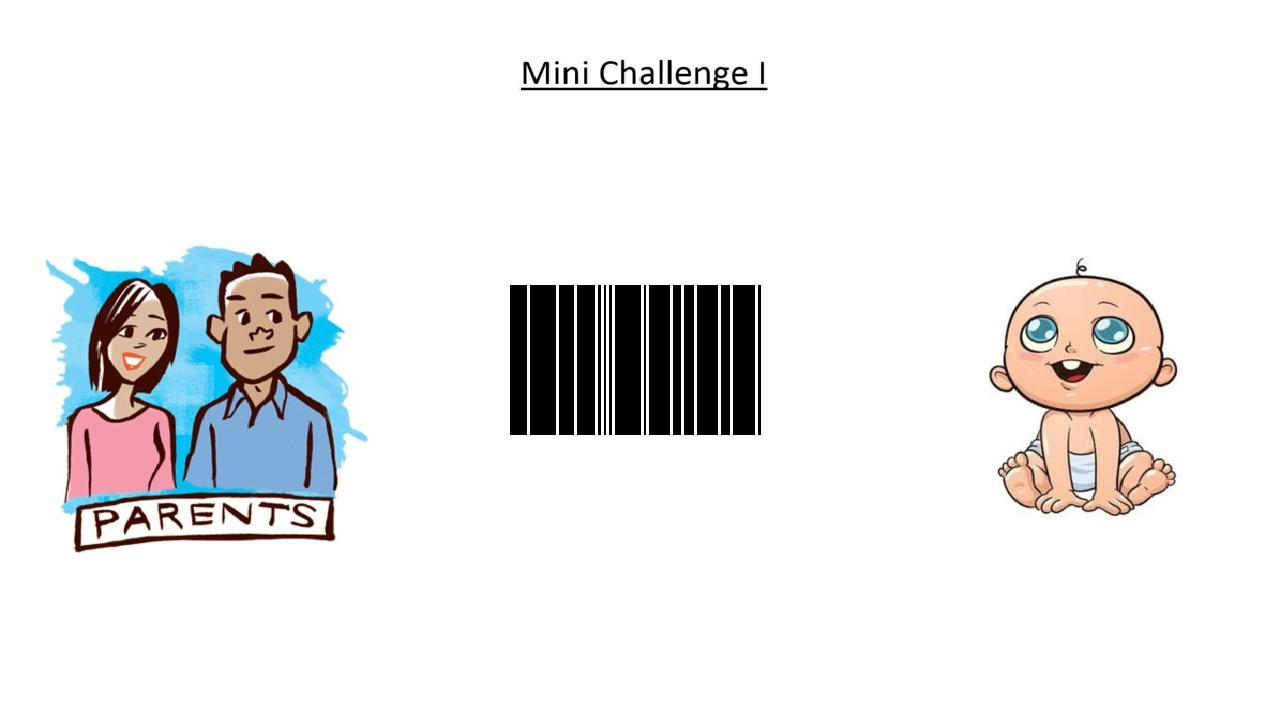

In [1]:
from PIL import Image
image_file = "/home/xilinx/jupyter_notebooks/common/data/minichallenge_1.jpg"
img = Image.open(image_file)
img